In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, Trajectory, TrackConverter

In [2]:
# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()
track_converter = TrackConverter()

Initializing pre-processing class
Initializing TrackConverter class


In [3]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox

# use just one track
# 'track' is appended to non-sensor related column names while pulling the data using track_api client
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]


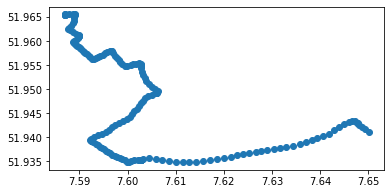

In [3]:
single_track.plot()

In [4]:
# represent single track as a Trajectory object
trajectory = Trajectory(single_track_id, track_df, 'track.id')
str(trajectory)

'Trajectory 5ddfd2ba44ea85025c02d828 (2019-11-28T13:41:36 to 2019-11-28T13:57:24) | Size: 186'

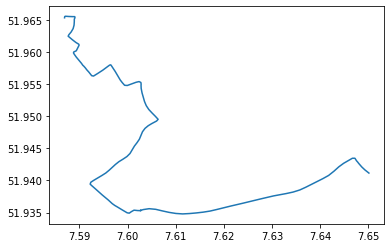

In [5]:
trajLineString = trajectory.to_linestring()

x,y = trajLineString.xy
plt.plot(x, y)

TODO: Use trajectory object for below computations

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


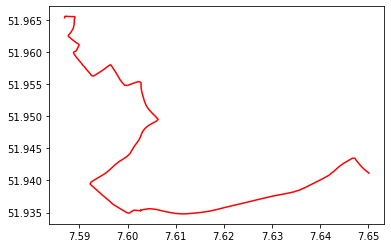

In [6]:
# Simple visualization of the raw trajectory
fig, ax = plt.subplots()
single_track_new = single_track
single_track_new['lat'] = single_track['geometry'].apply(lambda coord: coord.y)
single_track_new['lng'] = single_track['geometry'].apply(lambda coord: coord.x)
ax.plot(single_track_new['lng'], single_track_new['lat'], 'r-')
plt.show()

C:\Users\Sony\Documents\STUDYPROJECT\envirocar-py\envirocar\trajectories\preprocessing.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['lat'] = points['geometry'].apply(lambda coord: coord.y)
C:\Users\Sony\Documents\STUDYPROJECT\envirocar-py\envirocar\trajectories\preprocessing.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['lng'] = points['geometry'].apply(lambda coord: coord.x)


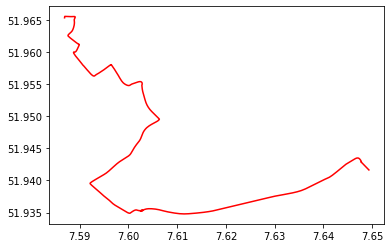

In [7]:
no_outliers = preprocessing.remove_outliers(single_track, 'CO2.value')

# interpolating for each second
interpolated_points = preprocessing.interpolate(no_outliers)

# Simple visualization of the trajectory after interpolation
fig, ax = plt.subplots()
ax.plot(interpolated_points['lng'], interpolated_points['lat'], 'r-')
plt.show()

In [12]:
interpolated_points

lng        lat  time_seconds  CO2.value  Speed.value  \
0    7.649308  51.941634  1.574949e+09  12.054959    49.911602   
1    7.649064  51.941829  1.574949e+09  10.214915    50.395653   
2    7.648845  51.942003  1.574949e+09   8.598061    50.384665   
3    7.648649  51.942157  1.574949e+09   7.191298    49.918930   
4    7.648476  51.942292  1.574949e+09   5.981524    49.038740   
..        ...        ...           ...        ...          ...   
932  7.586922  51.965354  1.574949e+09   2.827619    14.203717   
933  7.586922  51.965352  1.574949e+09   3.077820    12.701809   
934  7.586922  51.965350  1.574949e+09   3.441838     9.953640   
935  7.586921  51.965347  1.574949e+09   3.938035     5.779580   
936  7.586921  51.965344  1.574949e+09   4.584776     0.000000   

                                time  
0          2019-11-28 13:41:47+00:00  
1   2019-11-28 13:41:48.945570+00:00  
2   2019-11-28 13:41:50.683011+00:00  
3   2019-11-28 13:41:52.224638+00:00  
4   2019-11-28 13:41:53.582769+00:00  
..                               ...  
932 2019-11-28 13:57:19.932613+00:00  
933 2019-11-28 13:57:20.520520+00:00  
934 2019-11-28 13:57:21.352469+00:00  
935 2019-11-28 13:57:22.491337+00:00  
936        2019-11-28 13:57:24+00:00  

[937 rows x 6 columns]

In [8]:
import plotly.express as px

# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(single_track_new, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, before cleaning and interpolation", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [9]:
# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(interpolated_points, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, cleaned and interpolated", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

AGGREGATION WORK

In [4]:
bbox = BboxSelector([
    7.564130554199218, # min_x
    51.95590322041212, # min_y
    7.570351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
bbox_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting tracks inside the bbox

#conversion to moving pandas geodataframe format
bbox_mpd_df = track_converter.to_movingpandas(bbox_df)

# Aggregate Function
aggregatedflows = preprocessing.aggregate(bbox_mpd_df, 100, 5, 1000, 100, 5)

# Input Parameters!
# 01 - Moving Pandas GeoDataFrame, 
# 02 - Minimum Length of a Trajectory (to be considered as a Trajectory)
# 03 - Minimum Gap (in minutes) for splitting single Trajectory into more 
# 04 - Maximum distance between significant points 
# 05 - Minimum distance between significant points 
# 06 - Minimum duration (in minutes) required for stop detection

Finished creating 10 trajectories
Extracted 10 individual trips from 10 continuous vehicle tracks
Extracting significant points ...
  No. significant points: 456
Clustering significant points ...
  No. clusters: 69
Computing flows ...
Flows ready!


In [5]:
aggregatedflows

geometry  weight
0   LINESTRING (7.59889 51.96560, 7.58899 51.96490)       6
1   LINESTRING (7.58899 51.96490, 7.58360 51.96085)       7
2   LINESTRING (7.58360 51.96085, 7.57653 51.95924)       7
3   LINESTRING (7.57653 51.95924, 7.57013 51.95716)       7
4   LINESTRING (7.57013 51.95716, 7.56407 51.95430)       5
..                                              ...     ...
77  LINESTRING (7.59889 51.96560, 7.61305 51.96805)       1
78  LINESTRING (7.61305 51.96805, 7.61773 51.96306)       1
79  LINESTRING (7.61773 51.96306, 7.61986 51.95596)       1
80  LINESTRING (7.61986 51.95596, 7.63579 51.95216)       1
81  LINESTRING (7.63579 51.95216, 7.64760 51.94306)       1

[82 rows x 2 columns]

In [6]:
import folium 
m = folium.Map(location=[51.96560, 7.59889 ], zoom_start=12, tiles='cartodbpositron')

index = 0
for row in range(0,len(aggregatedflows)):
    my_poylyline = []
    mylng = aggregatedflows.loc[index,'geometry'].coords[0][0]
    mylat = aggregatedflows.loc[index,'geometry'].coords[0][1]
    my_poylyline.append( [ mylat , mylng ] )

    mylng = aggregatedflows.loc[index,'geometry'].coords[1][0]
    mylat = aggregatedflows.loc[index,'geometry'].coords[1][1]
    my_poylyline.append([mylat,mylng])
    
    myweight = int(aggregatedflows.loc[index,'weight'])
    my_line = folium.PolyLine(locations = my_poylyline, weight= myweight )
    m.add_child(my_line)
    
    index +=1 

m

ESTIMATE THE AVERAGE FLOW BETWEEN REGIONS!

In [7]:
from shapely.geometry import Point, LineString, Polygon
import movingpandas as mpd
from statistics import mean
import datetime 

bbox = BboxSelector([
    7.504130554199218, # min_x
    51.90590322041212, # min_y
    7.600351104736328, # max_x
    51.99874790276371  # max_y
])
    
# issue a query
bbox_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox

#conversion to moving pandas geodataframe format
bbox_mpd_df = track_converter.to_movingpandas(bbox_df)

In [8]:
# regions of interest
from_region = Polygon([(7.59, 51.955), (7.59, 51.97), (7.64, 51.97), (7.64, 51.955)])
to_region = Polygon([(7.61, 51.93), (7.61, 51.948), (7.66, 51.948), (7.66, 51.93)])

In [9]:
# function call to get trajectories running between regions
twoway = 1
between_region_trajectories = preprocessing.flow_between_regions(bbox_mpd_df, from_region, to_region, twoway)

Found 24 trajectories moving between provided regions with following details:
Average Distance: 8.69 kms
Maximum Distance: 9.52 kms
Average Duration: 0:17:45 
Maximum Duration: 0:28:01 


In [10]:
# to convert list of trajectories into a trajectory collection object for Aggregation 
regiontrajectores_collection = mpd.TrajectoryCollection(between_region_trajectories, 'track.id')

# aggregating trajectories to have information about average flow
aggregated_trajectories = mpd.TrajectoryCollectionAggregator(regiontrajectores_collection, max_distance=1000, min_distance=1, min_stop_duration=datetime.timedelta(minutes=5))

# extracting in form of flows and as gdf
averageflows_gdf = aggregated_trajectories.get_flows_gdf()
averageflows_gdf

Extracting significant points ...
  No. significant points: 457
Clustering significant points ...
  No. clusters: 17
Computing flows ...
Flows ready!


geometry  weight
0   LINESTRING (7.65532 51.93645, 7.64661 51.94292)      10
1   LINESTRING (7.64661 51.94292, 7.63227 51.93783)      11
2   LINESTRING (7.63227 51.93783, 7.62441 51.93749)      11
3   LINESTRING (7.62441 51.93749, 7.61797 51.93537)      12
4   LINESTRING (7.61797 51.93537, 7.60948 51.93496)      12
5   LINESTRING (7.60948 51.93496, 7.60238 51.93544)      12
6   LINESTRING (7.60238 51.93544, 7.60948 51.93496)      16
7   LINESTRING (7.60948 51.93496, 7.61107 51.94278)       6
8   LINESTRING (7.61107 51.94278, 7.61668 51.94976)       7
9   LINESTRING (7.61668 51.94976, 7.60467 51.95071)       7
10  LINESTRING (7.60467 51.95071, 7.60172 51.96350)      13
11  LINESTRING (7.60172 51.96350, 7.59276 51.96519)      14
12  LINESTRING (7.59276 51.96519, 7.60172 51.96350)       7
13  LINESTRING (7.60172 51.96350, 7.60467 51.95071)      10
14  LINESTRING (7.60467 51.95071, 7.59672 51.94204)      10
15  LINESTRING (7.59672 51.94204, 7.59225 51.93947)      10
16  LINESTRING (7.59225 51.93947, 7.60238 51.93544)      10
17  LINESTRING (7.60948 51.93496, 7.61797 51.93537)      10
18  LINESTRING (7.61797 51.93537, 7.62441 51.93749)      10
19  LINESTRING (7.62441 51.93749, 7.63227 51.93783)      10
20  LINESTRING (7.63227 51.93783, 7.64661 51.94292)      10
21  LINESTRING (7.64661 51.94292, 7.65532 51.93645)      10
22  LINESTRING (7.60238 51.93544, 7.59225 51.93947)       6
23  LINESTRING (7.59225 51.93947, 7.59672 51.94204)       6
24  LINESTRING (7.59672 51.94204, 7.60467 51.95071)       6
25  LINESTRING (7.61797 51.93537, 7.61107 51.94278)       1
26  LINESTRING (7.64661 51.94292, 7.63671 51.95152)       1
27  LINESTRING (7.63671 51.95152, 7.62677 51.95575)       1
28  LINESTRING (7.62677 51.95575, 7.61973 51.95657)       1
29  LINESTRING (7.61973 51.95657, 7.60172 51.96350)       1

In [11]:
import folium 
m = folium.Map(location=[51.92560, 7.63889 ], zoom_start=12, tiles='cartodbpositron')

################# PLOTTING REGIONS #################

from_poly_coords = []
to_poly_coords = []

# to extract coordiantes from "FIRST REGION" 
poly_index = 0 
for value in range(0,len(from_region.exterior.coords)):
    temp = []
    temp.append(from_region.exterior.coords[poly_index][1])
    temp.append(from_region.exterior.coords[poly_index][0])
    from_poly_coords.append(temp)
    poly_index +=1

# to extract coordiantes from "SECOND REGION" 
poly_index = 0 
for value in range(0,len(to_region.exterior.coords)):
    temp = []
    temp.append(to_region.exterior.coords[poly_index][1])
    temp.append(to_region.exterior.coords[poly_index][0])
    to_poly_coords.append(temp)
    poly_index +=1

# Plotting both the Regions
first_region = folium.Polygon(locations = from_poly_coords, color='orange')
m.add_child(first_region)
second_region = folium.Polygon(locations = to_poly_coords, color='green')
m.add_child(second_region)


################# PLOTTING TRAJECTORIES #################

departure_points = []
trajectory_row = 0

# to extract coordiantes from "TRAJECTORIES" 
for trajectory in range(0, len(regiontrajectores_collection.trajectories)):
    point_row = 0 
    for point in range(0, len(regiontrajectores_collection.trajectories[trajectory_row].df)):
        temp = []
        temp.append(regiontrajectores_collection.trajectories[trajectory_row].df['geometry'][point_row].y)
        temp.append(regiontrajectores_collection.trajectories[trajectory_row].df['geometry'][point_row].x)
        departure_points.append(temp)
        point_row += 1 
    trajectory_row += 1
    
# Plotting Trajectories 
index = 0   
for row in range(0,len(departure_points)):
    folium.Circle(radius=5, location = departure_points[index], color='crimson').add_to(m)
    index += 1 

################# PLOTTING AVERAGE FLOW #################

index = 0
# to extract coordiantes from "FLOWS" 
for row in range(0,len(averageflows_gdf)):
    my_poylyline = []
    mylng = averageflows_gdf.loc[index,'geometry'].coords[0][0]
    mylat = averageflows_gdf.loc[index,'geometry'].coords[0][1]
    my_poylyline.append( [ mylat , mylng ] )

    mylng = averageflows_gdf.loc[index,'geometry'].coords[1][0]
    mylat = averageflows_gdf.loc[index,'geometry'].coords[1][1]
    my_poylyline.append([mylat,mylng])
    
    myweight = int(averageflows_gdf.loc[index,'weight'])
    my_line = folium.PolyLine(locations = my_poylyline, weight=round((myweight/2)))
    m.add_child(my_line)
    
    index +=1 
    
m

CLUSTERING WORK!

In [ ]:
# TODO CLUSTERING

# convert to a moving pandas format using Sebastian's converter
# if using moving pandas format
single_track_mp = track_converter.to_movingpandas(single_track)
# call the clustering function from the preprocessing
clustered_track = preprocessing.cluster(single_track_mp)
clustered_track

# visualize the result